In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import gudhi

import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from TopoMap import TopoMapCut

In [2]:
def plot_data_cluster_component(df):

    fig = make_subplots(rows=1, cols=2,
                        specs=[[{'type': 'scene'}, 
                                {'type': 'scene'}]],
                        subplot_titles=('Original clusters', 
                                        'Components'))

    fig.add_trace(
        go.Scatter3d(x=df['x'], y=df['y'], z=df['z'],
                     mode='markers',
                     marker=dict(size=3,
                                 color=df['ClusterId'],
                                 colorscale=px.colors.qualitative.D3),
                     ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter3d(x=df['x'], y=df['y'], z=df['z'],
                     mode='markers',
                     marker=dict(size=3,
                                 color=df['component'],
                                 colorscale=px.colors.qualitative.D3),
                     ),
        row=1, col=2
    )


    fig.update_layout(showlegend=False,
                      height=600,
                      width=1400)

    return fig

In [3]:
df_blobs = pd.read_csv('data/3blobs.csv')
data_blobs = df_blobs[['x','y','z']].values
proj_original_blobs = np.genfromtxt('data/3blobs_output.csv', delimiter=',')

In [4]:
topocut_blobs = TopoMapCut(data_blobs)
components_blobs = topocut_blobs.get_components(min_dist=0.5)
subsets_blobs = components_blobs.subsets()

In [5]:
df_blobs['component'] = 0

for i in range(len(data_blobs)):
    for j in range(len(subsets_blobs)):
        if i in subsets_blobs[j]:
            df_blobs.loc[i,'component'] = j

In [6]:
plot_data_cluster_component(df_blobs)

In [7]:
df_rings = pd.read_csv('data/3rings.csv')
data_rings = df_rings[['x','y','z']].values
proj_original_rings = np.genfromtxt('data/3rings_output.csv', delimiter=',')

In [8]:
topocut_rings = TopoMapCut(data_rings)
components_rings = topocut_rings.get_components(max_components=5)
subsets_rings = components_rings.subsets()
print(f'Number of components: {len(subsets_rings)}')

Number of components: 5


In [9]:
df_rings['component'] = 0

for i in range(len(df_rings)):
    for j in range(len(subsets_rings)):
        if i in subsets_rings[j]:
            df_rings.loc[i,'component'] = j

In [10]:
plot_data_cluster_component(df_rings)

In [11]:
proj_subsets = topocut_rings.project_components(proj_method='tsne')

In [12]:
projections = topocut_rings.join_components()

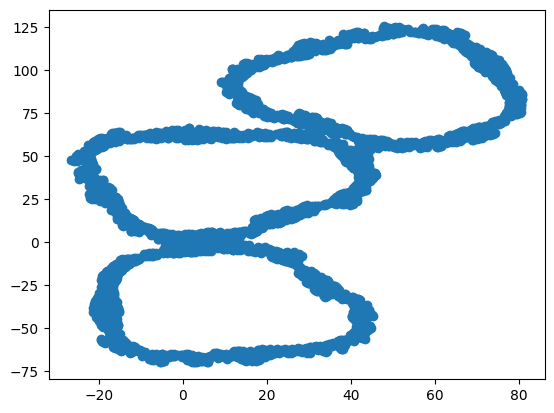

In [13]:
plt.scatter(projections[:,0], projections[:,1])

Number of points in A: 1070
Number of points in B: 2140
Distance: 0.9170418755978377


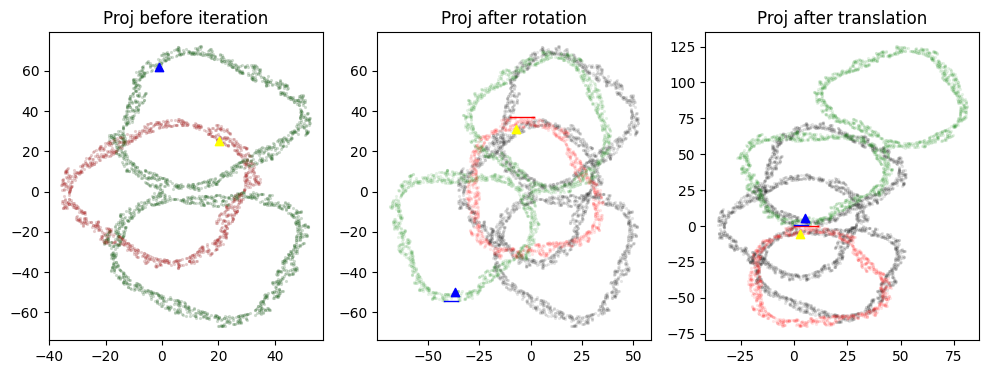

In [14]:
topocut_rings = TopoMapCut(data_rings)
components_rings = topocut_rings.get_components(max_components=5)
proj_subsets = topocut_rings.project_components(proj_method='tsne')
projections, components = topocut_rings.run_iter(iter=4)